# Independent Data Analysis Project

#**Nombre del Estudiante:** Paula Vanesa Criollo Nuñez

# **1.Introduction**

## *1.1 Exploratory Data Analysis – Spotify Tracks (1921–2020)*


This project analyzes the Spotify 1921–2020 dataset, containing over 28.680 tracks and 16 musical features, to identify patterns associated with streaming popularity.

The analysis reveals a highly unequal popularity distribution, where a small proportion of songs concentrates most of the attention. Medium-length tracks (2–4 minutes) with higher energy levels tend to achieve stronger popularity scores, while very long tracks generally underperform. Strong correlations were identified between loudness and energy (0.79) and between acousticness and energy (-0.80), reflecting coherent acoustic relationships.

However, musical features alone do not fully explain popularity. The results suggest that external factors such as playlist placement, marketing strategies, and evolving digital consumption behaviors play a critical role in streaming success.

This project demonstrates the practical application of exploratory data analysis, feature transformation, and critical interpretation within a real-world music industry context.

## *1.2 Objectives*

- Perform exploratory data analysis (EDA) to understand the distribution and behavior of musical features.

- Evaluate the relationship between audio characteristics and track popularity.

- Detect and analyze outliers to assess their impact on the dataset.

- Clean, transform, and prepare the data for advanced analytical tasks.

- Identify consumption patterns and long-term musical trends.

- Generate actionable insights applicable to data-driven decision-making in the music industry.-

# **2. Exploratory Data Analysis**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

dfr = pd.read_csv("data_w_genres.csv")

#You show us the first 5 rows of the list.
dfr.head()


,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [3]:
#You show us the last 5 rows of the list.
dfr.tail()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.3060,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.0,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.3340,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.0,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.1484,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.0,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.6860,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.0,11,1,2
28679,['classic korean pop'],조정현,0.568000,0.447000,237688.000000,0.2150,0.000001,0.064900,-16.478000,0.027200,71.979000,0.177000,31.0,10,1,2


In [4]:
#dataset dimensions
dfr.shape

(28680, 16)

In [5]:
#variable types
dfr.dtypes


,0
genres,object
artists,object
acousticness,float64
danceability,float64
duration_ms,float64
energy,float64
instrumentalness,float64
liveness,float64
loudness,float64
speechiness,float64


## 2.1 Data Understanding

### *2.1.1 Variable Types*

The dataset contains both categorical and numerical variables describing musical attributes and track performance.

***Categorical Variables***

- genres (object) → List of musical genres associated with each track.

- artists (object) → Name of the artist or group performing the track.

These variables allow segmentation and analysis by musical style and performer.

***Numerical Variables***
Continuous Variables (float64)

- acousticness → Degree to which a track is acoustic.

- danceability → Measure of how suitable a track is for dancing.

- energy → Intensity and activity level of a track.

- instrumentalness → Likelihood that a track contains no vocals.

- liveness → Probability that the track was recorded live.

- loudness → Overall loudness of a track (in decibels).

- speechiness → Presence of spoken words in a track.

- valence → Musical positiveness conveyed by the track.

- tempo → Speed of the track in beats per minute (BPM).

- duration_ms → Duration of the track in milliseconds.

- popularity → Popularity score assigned by Spotify (0–100 scale).

***Discrete Variables (int64)***

- key → Musical key of the track (encoded as an integer).

- mode → Modality of the track (major or minor, encoded as binary).

- count → Number of related records (e.g., versions or covers).

***Dataset Summary***

- float64: 11 variables

- int64: 3 variables

- object: 2 variables



### *2.1.2 Detect Missing or Undefined Values*


In [6]:
#number of non-null data
dfr.info()

#number of null data
dfr.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

,0
genres,0
artists,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0


In [7]:
#Mean, Standard Deviation, Minimum Maximum and Percentiles 25, 50 (median) and 75
dfr.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


**Descriptive Statistics Summary**

The dataset contains 28,680 tracks and 16 features, with no missing values detected across any of the columns. All variables contain complete records, ensuring data consistency for analysis.

*The summary statistics provide the following insights:*

- Count → Each of the 16 columns contains 28,680 non-null observations, confirming that there are no missing values in the dataset.

- Mean → Represents the average value for each numerical variable, providing a general overview of central tendency across features.

- Standard Deviation (std) → Measures the dispersion of the data relative to the mean. Variables such as tempo, popularity, and count show higher standard deviation values, indicating greater variability among tracks in these attributes.

- Minimum (min) → The lowest observed value in each column. Several variables have a minimum value of 0, which is expected for scaled musical attributes such as acousticness, energy, or popularity.

- 25th Percentile (Q1) → Indicates that 25% of the data falls below or is equal to this value.

- Median (50% / Q2) → Represents the midpoint of the distribution, dividing the dataset into two equal halves.

- 75th Percentile (Q3) → Indicates that 75% of the observations fall below or are equal to this value.

- Maximum (max) → The highest observed value in each variable.

Overall, the absence of missing values and the variability observed in certain features provide a solid foundation for exploratory analysis and further modeling.

## 2.2 Categorical Variable Analysis


In [8]:
#Description of categorical variables
dfr.describe(include='object')


,genres,artists
count,28680,28680
unique,10743,28680
top,[],조정현
freq,9857,1


**Categorical Variables Analysis**

The dataset includes two categorical variables that define the identity of each track:

- Genres

- Artists

Both variables contain complete records, with no missing values.

***Genres***

The genres variable contains 10,743 unique genre labels, reflecting a high level of musical diversity within the dataset.

The most frequent genre appears 9,857 times, which represents a significant concentration compared to other categories. This suggests a potential imbalance in genre distribution, where certain musical styles are disproportionately represented.

Such concentration should be examined carefully, as it may influence overall trend analysis and potentially bias conclusions regarding popularity and feature relationships.

***Artists***

The artists variable contains 28,680 unique entries, indicating that most tracks in the dataset are associated with distinct artists.

The most frequent artist in the dataset is a Korean artist, suggesting strong representation from that market segment. This dominance may reflect regional trends, streaming behavior, or dataset composition rather than global popularity alone.

In [9]:
#We observe some of the genres that appear in this variable and we realize the existence of that pattern.
dfr['genres'].value_counts().head(10)

,count
genres,
[],9857
['movie tunes'],69
['show tunes'],63
['hollywood'],56
['orchestral performance'],50
"['broadway', 'hollywood', 'show tunes']",48
"['disney', 'movie tunes']",45
['sleep'],42
['gospel'],41


In [10]:
#We made a copy of the original dataset
df = dfr.copy()

#The words [] are replaced by the abbreviation Unknown.
df['genres'] = df['genres'].str.replace('[]', '[Unknown]')

#The result is printed.
print(df['genres'])

0                                           ['show tunes']
1                                                [Unknown]
2                                                [Unknown]
3                                                [Unknown]
4                                                [Unknown]
                               ...                        
28675                                            [Unknown]
28676    ['c-pop', 'classic cantopop', 'classic mandopo...
28677                                            [Unknown]
28678              ['chinese indie', 'chinese indie rock']
28679                               ['classic korean pop']
Name: genres, Length: 28680, dtype: object


**Data Cleaning – Handling Missing Genre Labels**

During the analysis of the genres variable, it was identified that 9,857 tracks contained the value [], representing empty or undefined genre entries.

In Spotify datasets, it is common for some artists or tracks not to be explicitly categorized under a specific musical genre. In this case, the value [] can be interpreted as either:

- An undefined genre, or

- A poorly formatted empty list.

To ensure consistency and improve interpretability, these values were treated as missing categorical information.

Using string operations in Python, all occurrences of [] were replaced with the label:

"Unknown"

This transformation allows the dataset to:

- Avoid ambiguity in categorical analysis

- Maintain data consistency

- Enable clearer frequency and segmentation analysis

By standardizing undefined genres under a single category, the dataset becomes more suitable for distribution analysis and visualization

### *2.2.1 Most Frequent Genres*

/tmp/ipython-input-3657310697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


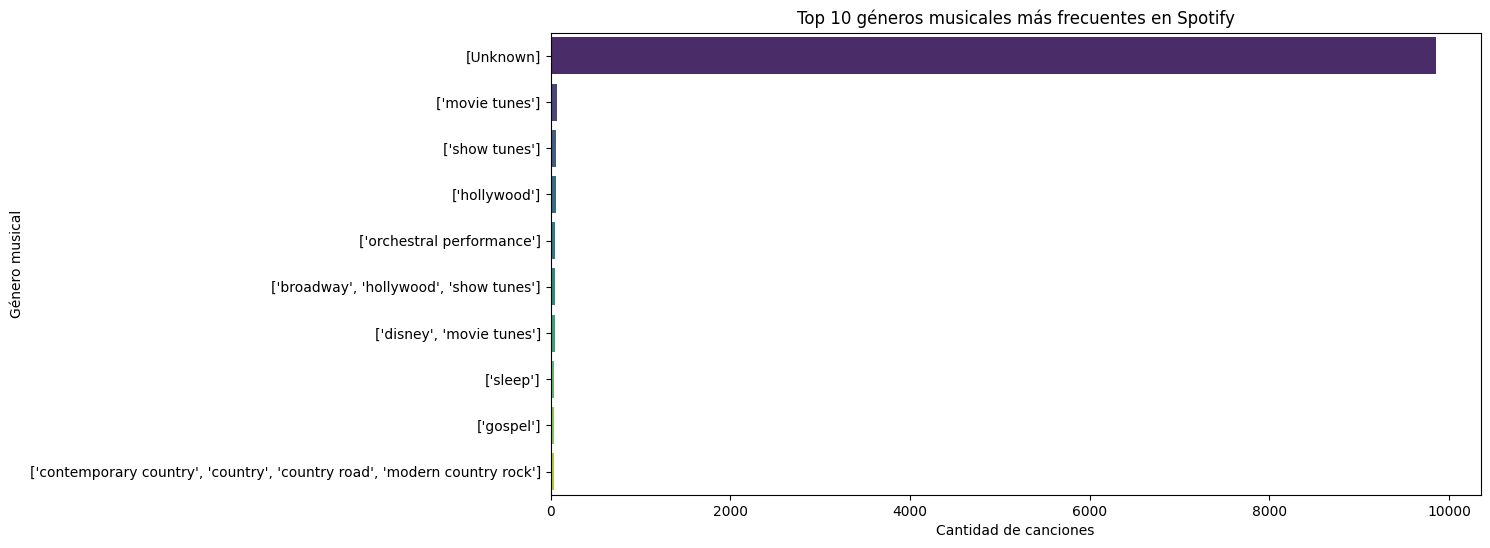

In [11]:
df['genres'].head()

genre_counts = df['genres'].value_counts().head(10)
genre_counts

plt.figure(figsize=(12,6))
sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    palette="viridis"
)

plt.title("Top 10 géneros musicales más frecuentes en Spotify")
plt.xlabel("Cantidad de canciones")
plt.ylabel("Género musical")
plt.show()


**Conclusion**

In the digital streaming era, classifying music into well-defined genres has become increasingly complex. The analysis revealed that approximately 9,857 tracks were categorized as "Unknown", indicating that a significant portion of the dataset lacks clearly defined genre information.

This may be attributed to several factors, including incomplete or improperly formatted metadata, the absence of genre tagging by artists or distributors, and limitations in automated classification algorithms used by streaming platforms.

Additionally, contemporary music often blends multiple genres, making it difficult to establish clear categorical boundaries. The emergence of context-based labels — such as sleep music or Disney music — further complicates traditional genre classification, as these categories describe usage or theme rather than musical structure.

Moreover, some genre labels are overly broad (e.g., Colombian music, country), reducing analytical precision and limiting segmentation accuracy.

Overall, these findings highlight the challenges of working with categorical metadata in large-scale music datasets and emphasize the importance of data cleaning and standardization for meaningful analysis.

### *2.2.2 Number of Unique Categories*

In [12]:
#Number of unique data points in each column or variable.
df.nunique()

,0
genres,10743
artists,28680
acousticness,14127
danceability,10651
duration_ms,23960
energy,12125
instrumentalness,15513
liveness,12156
loudness,21862
speechiness,10949


In [14]:

#Data that appears most frequently in each column
print('Valores con mayor frecuencia en cada columna:')
print(df.mode().iloc[0])

Valores con mayor frecuencia en cada columna:
genres                                     [Unknown]
artists             "Cats" 1981 Original London Cast
acousticness                                   0.995
danceability                                   0.463
duration_ms                                 218640.0
energy                                           0.7
instrumentalness                                 0.0
liveness                                       0.107
loudness                                    -10.9785
speechiness                                   0.0307
tempo                                            0.0
valence                                        0.961
popularity                                       0.0
key                                              7.0
mode                                             1.0
count                                            2.0
Name: 0, dtype: object


## 2.3 Correlation Analysis


Before generating the correlation matrix, it was necessary to evaluate whether all variables were suitable for correlation analysis.

Although several variables are numeric, not all of them are appropriate for measuring linear relationships between musical features. After reviewing the dataset, three variables were excluded from the correlation analysis:

- count → While this variable is numeric, it represents the number of related versions or records associated with a track. It does not describe intrinsic musical characteristics and may introduce noise into the correlation analysis.

- mode → This is a binary variable indicating whether a track is in a major or minor key. Although encoded numerically (0 or 1), it represents a categorical attribute rather than a continuous musical measurement, which limits its interpretability in a Pearson correlation context.

- key → This variable represents the musical key (e.g., C, D, E, F, G, etc.) encoded as an integer. Despite being stored as numeric, it is inherently categorical and does not follow a continuous or ordinal scale suitable for correlation analysis.

By excluding these variables, the correlation matrix focuses exclusively on continuous numerical features that meaningfully describe musical properties, such as energy, danceability, loudness, tempo, and popularity.

This approach ensures a more accurate interpretation of linear relationships between quantitative musical attributes.


In [15]:
df[['key', 'mode','count']].head(10)

,key,mode,count
0,5,1,9
1,5,1,26
2,0,1,7
3,0,1,27
4,5,1,7
5,5,1,36
6,8,1,2
7,10,1,2
8,9,1,122
9,1,1,15


In [16]:
# Create a new DataFrame discarding key, count, and mode
df_corr = df.drop(columns=['key', 'count', 'mode'])

# See the first rows
df_corr.head()


,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333
1,[Unknown],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923
2,[Unknown],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143
3,[Unknown],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852
4,[Unknown],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000


In [17]:
# Select from the numerical variables
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity'],
      dtype='object')

### *2.3.1 Key Relationships*

In [18]:
# Select numeric columns
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

corr_matrix.round(2)


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
acousticness,1.00,-0.42,-0.06,-0.80,0.29,0.03,-0.63,-0.04,-0.26,-0.21,-0.56
danceability,-0.42,1.00,-0.11,0.40,-0.31,-0.10,0.47,0.26,0.12,0.60,0.25
duration_ms,-0.06,-0.11,1.00,-0.00,0.12,-0.02,-0.08,0.01,-0.05,-0.20,0.01
energy,-0.80,0.40,-0.00,1.00,-0.29,0.10,0.79,0.07,0.31,0.38,0.42
instrumentalness,0.29,-0.31,0.12,-0.29,1.00,-0.06,-0.45,-0.15,-0.13,-0.26,-0.24
liveness,0.03,-0.10,-0.02,0.10,-0.06,1.00,0.05,0.18,-0.03,0.01,-0.12
loudness,-0.63,0.47,-0.08,0.79,-0.45,0.05,1.00,0.05,0.27,0.39,0.33
speechiness,-0.04,0.26,0.01,0.07,-0.15,0.18,0.05,1.00,-0.02,0.11,-0.03
tempo,-0.26,0.12,-0.05,0.31,-0.13,-0.03,0.27,-0.02,1.00,0.20,0.13
valence,-0.21,0.60,-0.20,0.38,-0.26,0.01,0.39,0.11,0.20,1.00,0.00


In [19]:
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]

# the strongest positive correlations
corr_pairs.sort_values(ascending=False).head(5)


energy        loudness        0.794341
loudness      energy          0.794341
valence       danceability    0.598748
danceability  valence         0.598748
              loudness        0.474819
dtype: float64

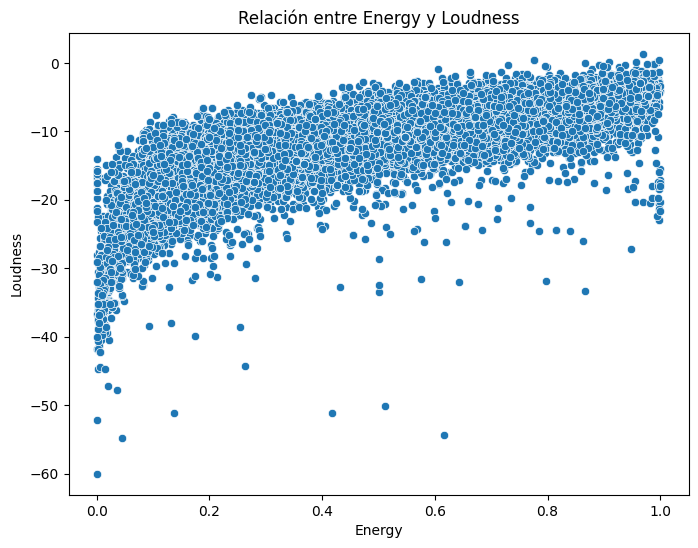

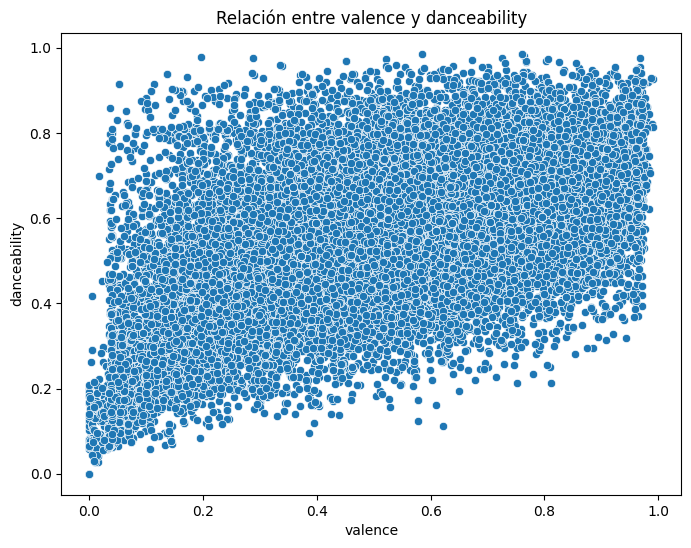

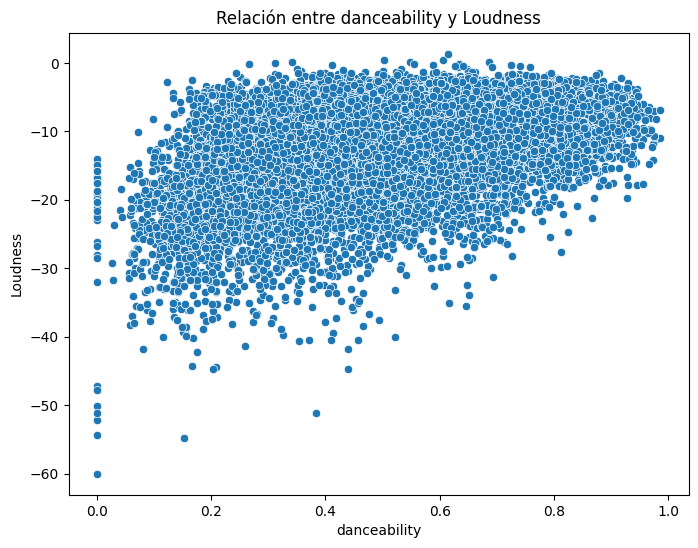

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='energy', y='loudness', data=df_corr)
plt.title('Relación entre Energy y Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(x='valence', y='danceability', data=df_corr)
plt.title('Relación entre valence y danceability')
plt.xlabel('valence')
plt.ylabel('danceability')
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(x='danceability', y='loudness', data=df_corr)
plt.title('Relación entre danceability y Loudness')
plt.xlabel('danceability')
plt.ylabel('Loudness')
plt.show()




**Interpretation of Strongest Correlations:**

Loudness is measured in decibels (dB) and typically ranges from very low values (e.g., -60 dB, near silence) to values close to 0 dB, which represent higher perceived volume. For example:

| Loudness (dB) | Interpretation               |
| ------------- | ---------------------------- |
| -5            | Very high volume (close to maximum)|
| -12           | Moderate volume            |
| -60           | Very low volume (near silence)      |

Understanding this scale is important when interpreting its relationship with other musical attributes.

- *Energy and Loudness*

The analysis shows a positive correlation between energy and loudness, indicating that louder songs tend to be more energetic.

This relationship is conceptually consistent, as higher loudness often reflects stronger instrumentation and production intensity. However, the scatter plot reveals noticeable dispersion among data points, suggesting that while the relationship exists, it is not perfectly linear.

This indicates that loudness alone does not fully determine a track’s perceived energy.

- *Valence and Danceability*

A weak positive correlation was observed between valence (musical positivity) and danceability.

This suggests that more danceable songs tend to be perceived as more positive or joyful. However, the relationship is relatively weak, and the visualization shows multiple exceptions — meaning that not all danceable songs convey positive emotional tone.

This highlights the multidimensional nature of musical perception.

- *Danceability and Loudness*

A weak positive correlation was also found between danceability and loudness.

While more danceable tracks may slightly trend toward higher loudness levels, the dispersion of data points indicates that volume is not a strong predictor of danceability.

In other words, a loud track is not necessarily a danceable one.



In [21]:
# Stronger negatives
corr_pairs.sort_values().head(5)

,,0
acousticness,energy,-0.801428
energy,acousticness,-0.801428
acousticness,loudness,-0.628415
loudness,acousticness,-0.628415
acousticness,popularity,-0.556790


**Weakest Correlations**

- ***Acousticness and Energy***

A negative correlation was observed between acousticness and energy, indicating that more acoustic tracks tend to have lower energy levels.

This relationship is conceptually consistent, as acoustic songs often rely on softer instrumentation and minimal production compared to high-energy electronic or amplified tracks.

- ***Acousticness and Loudness***

A negative correlation was also identified between acousticness and loudness.

This suggests that acoustic tracks generally have lower volume levels, which aligns with typical production styles that emphasize natural sound dynamics rather than amplified intensity.

However, as with most correlations in this dataset, the relationship is moderate rather than strong, meaning exceptions do exist.

- ***Acousticness and Popularity***

A weak negative correlation was found between acousticness and popularity.

This may suggest that highly acoustic songs tend to be slightly less popular on Spotify. However, this relationship should be interpreted with caution. Popularity is influenced by multiple external factors such as marketing, artist reputation, cultural trends, and playlist placement — not solely by musical structure.

Therefore, while acoustic tracks show a tendency toward lower popularity scores, acousticness alone is not a decisive predictor of streaming success.

### *2.3.2 Correlation Matrix*

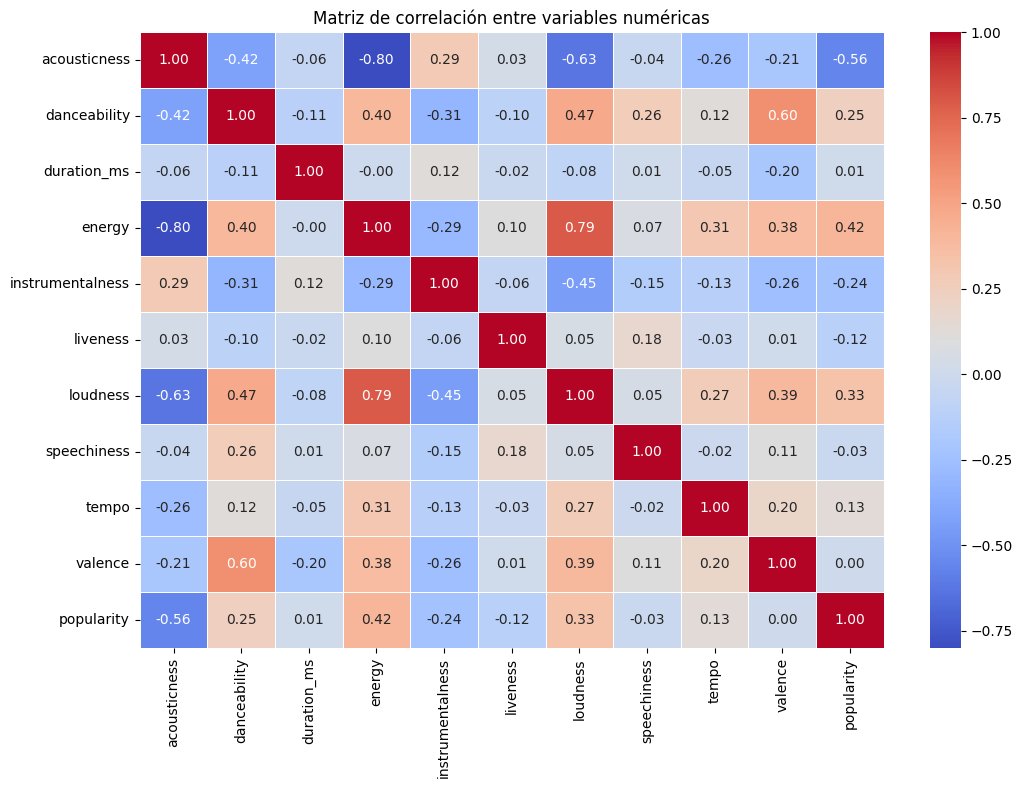

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de correlación entre variables numéricas")
plt.show()


**Interpretative Analysis**

The correlation matrix evaluates the relationships between numerical variables describing musical characteristics of Spotify tracks. By analyzing these variables collectively, it is possible to identify key patterns and understand how certain features tend to coexist.

The strongest positive correlation identified (0.79) occurs between loudness and energy. This suggests that more energetic songs generally exhibit higher loudness levels — a relationship that is acoustically consistent, as energetic tracks often involve stronger instrumentation and production intensity.

Conversely, a strong negative correlation (-0.80) was observed between acousticness and energy. This indicates that tracks with a higher presence of acoustic elements tend to be less intense or energetic. This inverse relationship aligns with typical production characteristics of acoustic music, which often emphasizes softer dynamics and minimal amplification.

Another notable relationship is found between danceability and valence, with a moderate positive correlation of 0.60. This suggests that more danceable tracks tend to convey more positive or uplifting emotions. However, the strength of this correlation indicates that exceptions still exist, reinforcing the multidimensional nature of musical perception.

Overall, the observed correlations provide valuable insight into how musical attributes interact and coexist. These relationships help explain structural patterns in song composition and may offer useful perspectives for understanding listener perception and streaming performance.

## 2.4 Statistical Distribution & Variability

- Visualization of statistics
- Numerical variables: popularity, danceability, energy

### *2.4.1 Summary Statistics*

In [23]:
#We will continue working with the 10 most popular genres on Spotify
top_genres = df_corr['genres'].value_counts().head(10).index
df_top = df_corr[df_corr['genres'].isin(top_genres)]

#We group and obtain statistics
group_stats = (df_top.groupby('genres')[[ 'energy','popularity', 'danceability']].describe())


group_stats.round(2)



energy                    \
                                                     count  mean   std   min   
genres                                                                         
['broadway', 'hollywood', 'show tunes']               48.0  0.49  0.20  0.18   
['contemporary country', 'country', 'country ro...    41.0  0.71  0.10  0.43   
['disney', 'movie tunes']                             45.0  0.33  0.16  0.05   
['gospel']                                            41.0  0.61  0.16  0.28   
['hollywood']                                         56.0  0.47  0.21  0.07   
['movie tunes']                                       69.0  0.38  0.19  0.11   
['orchestral performance']                            50.0  0.15  0.13  0.00   
['show tunes']                                        63.0  0.46  0.19  0.08   
['sleep']                                             42.0  0.26  0.28  0.00   
[Unknown]                                           9857.0  0.42  0.25  0.00   

                                                                            \
                                                     25%   50%   75%   max   
genres                                                                       
['broadway', 'hollywood', 'show tunes']             0.35  0.46  0.61  0.96   
['contemporary country', 'country', 'country ro...  0.66  0.72  0.75  0.92   
['disney', 'movie tunes']                           0.22  0.31  0.39  0.82   
['gospel']                                          0.48  0.61  0.73  0.90   
['hollywood']                                       0.32  0.42  0.63  0.90   
['movie tunes']                                     0.21  0.36  0.48  0.87   
['orchestral performance']                          0.06  0.12  0.20  0.72   
['show tunes']                                      0.34  0.48  0.54  0.92   
['sleep']                                           0.00  0.19  0.48  0.88   
[Unknown]                                           0.22  0.38  0.60  1.00   

                                                   popularity         ...  \
                                                        count   mean  ...   
genres                                                                ...   
['broadway', 'hollywood', 'show tunes']                  48.0  45.57  ...   
['contemporary country', 'country', 'country ro...       41.0  52.38  ...   
['disney', 'movie tunes']                                45.0  44.16  ...   
['gospel']                                               41.0  40.26  ...   
['hollywood']                                            56.0  46.88  ...   
['movie tunes']                                          69.0  41.54  ...   
['orchestral performance']                               50.0  29.89  ...   
['show tunes']                                           63.0  49.12  ...   
['sleep']                                                42.0  55.21  ...   
[Unknown]                                              9857.0  20.86  ...   

                                                                 danceability  \
                                                      75%    max        count   
genres                                                                          
['broadway', 'hollywood', 'show tunes']             54.99  69.80         48.0   
['contemporary country', 'country', 'country ro...  60.38  66.00         41.0   
['disney', 'movie tunes']                           50.00  62.00         45.0   
['gospel']                                          44.40  58.00         41.0   
['hollywood']                                       56.54  77.67         56.0   
['movie tunes']                                     54.00  72.80         69.0   
['orchestral performance']                          48.50  60.00         50.0   
['show tunes']                                      55.50  76.00         63.0   
['sleep']                                           62.75  77.75         42.0   
[Unknown]             

**Conclusions**

The genre-level analysis reveals meaningful differences in how musical attributes relate to popularity, danceability, and energy on Spotify.

Regarding popularity, the genre Sleep — associated with music designed for relaxation or sleep — presents the highest average popularity score in the dataset. Other highly popular genres include Country / Modern Country Rock, Show Tunes, and Hollywood. This suggests that contextual or purpose-driven genres may perform strongly on streaming platforms, possibly due to their inclusion in curated playlists and functional listening habits.

In terms of danceability, the most danceable genres identified were Show Tunes, Country / Modern Country Rock, and Broadway / Hollywood / Show Tunes. In contrast, the least danceable genre was Sleep, which aligns with its intended use as calming, low-intensity music. This distinction highlights how genre purpose influences measurable musical attributes.

Regarding energy, the most energetic genres include Contemporary Country / Country / Country Road / Modern Country Rock and Gospel. These genres typically feature dynamic instrumentation and expressive production, which may explain their higher energy levels.

Overall, the findings demonstrate that different genres emphasize distinct musical characteristics, and that streaming performance may be influenced not only by structural audio features but also by contextual listening behaviors and user intent.

### *2.4.2 Outlier Detection*
It is a numeric variable, represents performance, and its range is from 0-100, which is wide.

In [24]:
# Select the actual variable from the dataset
variable = df_corr['popularity']

# Calculate quartiles
Q1 = variable.quantile(0.25)
Q3 = variable.quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

outliers = df_corr[
    (df_corr['popularity'] < lower_bound) |
    (df_corr['popularity'] > upper_bound)
]
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 12.0
Q3: 51.0
IQR: 39.0


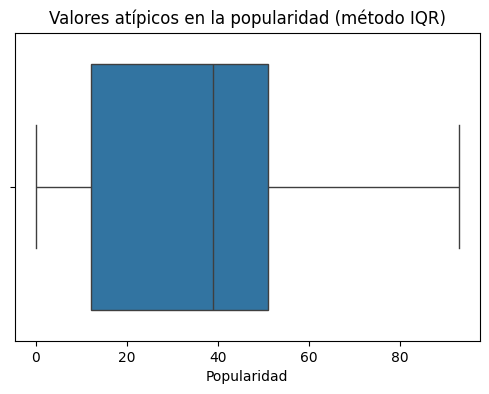

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['popularity'])

plt.title("Valores atípicos en la popularidad (método IQR)")
plt.xlabel("Popularidad")
plt.show()


**Outlier Detection – Popularity**

To identify outliers in the dataset, the Interquartile Range (IQR) method was applied to the popularity variable. Using the first quartile (Q1) and the third quartile (Q3), lower and upper bounds were established to detect extreme observations.

The results show that:

25% of the songs have a popularity score of 12 or lower, indicating low impact.

The central 50% of songs fall between 12 and 51, representing the typical popularity range.

Only the top 25% exceed a popularity score of 51, suggesting that achieving high popularity is relatively uncommon.

The IQR value of 39 reflects considerable variability in song performance across the dataset.

These findings indicate a high concentration of songs with low popularity. It is important to note that the dataset includes music released between 1921 and 2020, meaning it covers nearly a century of musical production. In today’s music industry, only a small percentage of songs capture widespread public attention. Factors such as marketing strategies, playlist placement, viral trends, and artist recognition significantly influence whether a song becomes popular.

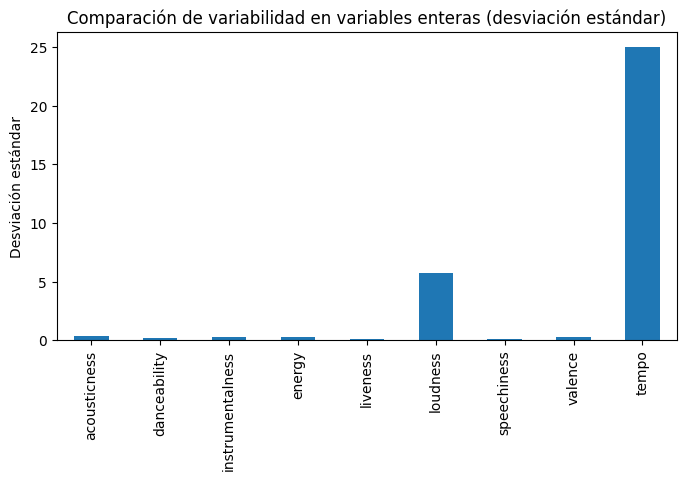

In [26]:
std_values = df_corr[
    ['acousticness', 'danceability', 'instrumentalness', 'energy', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
].std()

std_values.plot(kind='bar', figsize=(8,4), title="Comparación de variabilidad en variables enteras (desviación estándar)")
plt.ylabel("Desviación estándar")
plt.show()


**Variables with the Highest Variability**

Based on the graphical analysis and summary statistics, the variables that exhibit the greatest variability are duration_ms, tempo, popularity, and loudness.

The high variability in duration_ms indicates that song length differs considerably across the dataset, ranging from very short tracks to significantly longer compositions. This reflects the diversity of musical formats and production styles over time.

Similarly, tempo (measured in beats per minute) shows substantial dispersion. This suggests strong rhythmic differences between genres, for example, slower tempos in sleep or relaxing music versus faster tempos in genres such as rock, metal, or dance-oriented tracks.

The variability observed in popularity confirms that only a small proportion of songs achieve high recognition, while the majority remain moderately known or relatively unnoticed. This distribution aligns with the reality of the music industry, where a limited number of tracks capture most public attention.

Finally, loudness presents significant variability, reflecting differences in production style and genre characteristics. Acoustic or relaxing songs tend to have lower volume levels, while dance, country, and other energetic genres often feature higher loudness values.

Overall, the dispersion of these variables highlights the musical and commercial diversity present in the dataset.


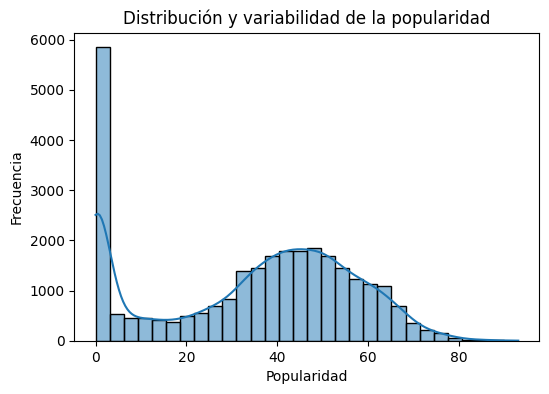

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df_corr['popularity'], bins=30, kde=True)

plt.title("Distribución y variabilidad de la popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.show()


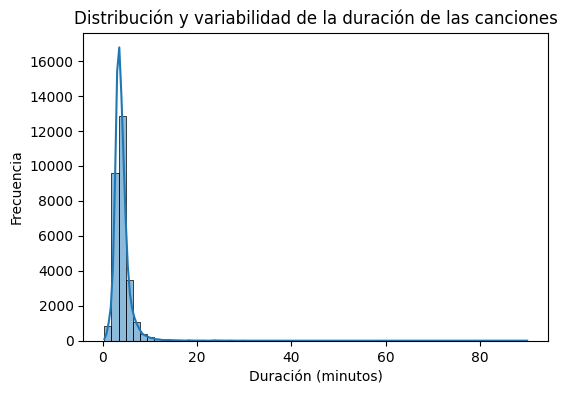

In [28]:

duration_min = df_corr['duration_ms'] / 60000

plt.figure(figsize=(6,4))
sns.histplot(duration_min, bins=60, kde=True)

plt.title("Distribución y variabilidad de la duración de las canciones")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.show()

**General Reflective Analysis**
- Which ones show unexpected behaviors?

One of the most unexpected behaviors was observed in the variable duration_ms, which represents song length in milliseconds. This variable shows high variability and a positively skewed distribution. Although most songs cluster within the standard commercial duration of 2 to 4 minutes, there are extreme outliers exceeding one hour.

These unusually long durations may correspond to live concert recordings, orchestral compositions, experimental productions, or special editions. Their presence highlights the diversity of musical formats within the dataset and reflects how digital platforms allow the distribution of non-traditional song structures.

- What preliminary insights does this exploration offer?

The exploratory analysis suggests that musical performance on Spotify does not depend exclusively on a song’s acoustic characteristics. Instead, popularity appears to be influenced by a combination of external factors such as marketing strategies, viral exposure on social media, playlist placement, and artist recognition.

A key insight is the strong inequality in popularity distribution: a small percentage of songs concentrates most of the attention, while the majority remains relatively unknown. This pattern reflects the competitive and highly concentrated nature of the music industry.

Interestingly, although one might assume that danceability is directly related to popularity, the correlation matrix shows that this relationship is weak. Being danceable does not guarantee commercial success.

Similarly, energy, which reflects the intensity and strength of a song, shows low correlation with popularity. This indicates that emotional intensity alone does not determine a song’s commercial impact.

Finally, the loudness variable reveals a relative homogeneity across songs. This suggests a level of production standardization in the music industry, where tracks tend to follow similar volume norms regardless of genre, likely influenced by mastering practices optimized for streaming platforms.



## 2.5 Duration & Popularity Segmentation

### *2.5.1 Conversion of Duration*

The variable to be categorized is **duration_ms**. To do this, I will convert it from milliseconds to minutes.

Defined Ranges



**Convert Continuous Variable to Categorical**

The variable to be categorized is **duration_ms**. To do this, I will convert it from milliseconds to minutes.

Defined Ranges

1. *Short song: < 2 minutes*
2. *Medium song: 2-4 minutes*
3. *Long song: 4-6 minutes*
4. *Very long song: > 6 minutes*


In [29]:
# Create duration in minutes
df['duration_min'] = df['duration_ms'] / 60000


### *2.5.2 Duration Categories*

In [30]:
# Categorize duration
bins = [0, 2, 4, 6, df['duration_min'].max()]
labels = ['Corta', 'Media', 'Larga', 'Muy larga']

df['duration_cat'] = pd.cut(df['duration_min'], bins=bins, labels=labels)


In [31]:
df[['duration_min', 'duration_cat']].head()


,duration_min,duration_cat
0,4.171976,Larga
1,4.788000,Larga
2,5.482000,Larga
3,4.381516,Larga
4,4.507269,Larga


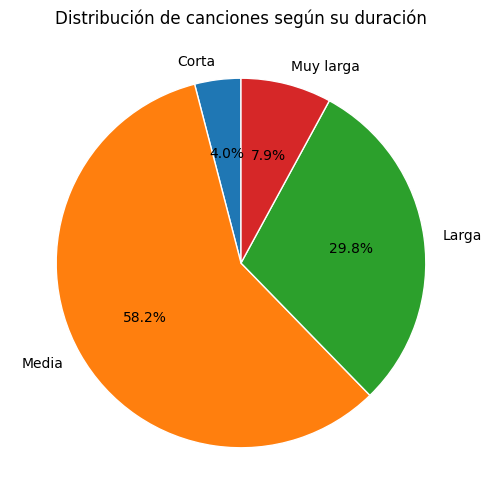

In [32]:
# Count songs by duration category
duration_counts = df['duration_cat'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    duration_counts,
    labels=duration_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de canciones según su duración")
plt.show()


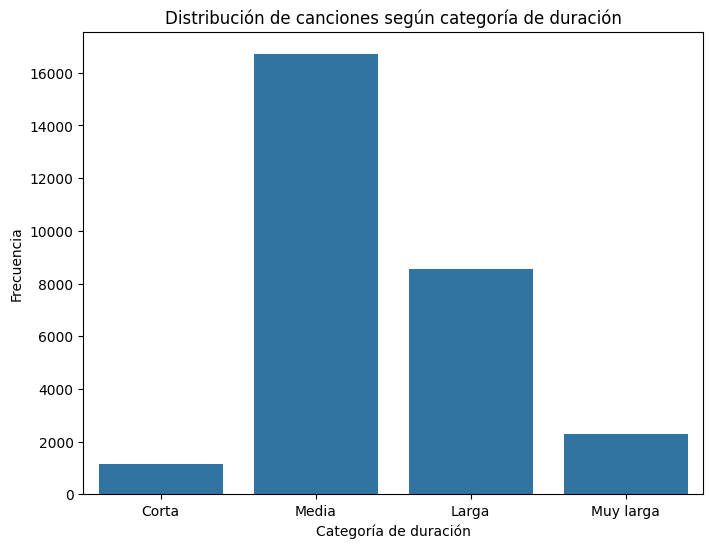

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(
    x='duration_cat',
    data=df,
    order=['Corta', 'Media', 'Larga', 'Muy larga']
)

plt.title("Distribución de canciones según categoría de duración")
plt.xlabel("Categoría de duración")
plt.ylabel("Frecuencia")
plt.show()


### *2.5.3 Duration vs Popularity Analysis*

/tmp/ipython-input-2782716006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


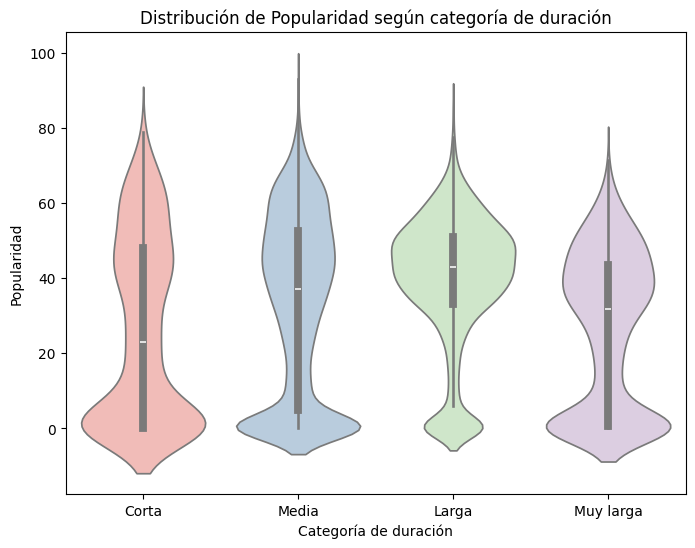

In [34]:
plt.figure(figsize=(8,6))
sns.violinplot(
    x='duration_cat',
    y='popularity',
    data=df,
    order=['Corta', 'Media', 'Larga', 'Muy larga'],
    palette='Pastel1'
)

plt.title("Distribución de Popularidad según categoría de duración")
plt.xlabel("Categoría de duración")
plt.ylabel("Popularidad")
plt.show()


**Justification**

The variable duration_ms was transformed into minutes to facilitate interpretation and improve analytical clarity. Subsequently, it was categorized into four ranges: short songs (< 2 minutes), medium-length songs (2–4 minutes), long songs (4–6 minutes), and very long songs (> 6 minutes).

These ranges were defined based on current music industry standards and the observed distribution of the data, where most songs cluster around the traditional commercial format of approximately three minutes. Categorizing the variable allows for a clearer understanding of structural patterns in song duration and enables comparative analysis across formats.

The pie chart derived from the categorized duration variable shows that 58.2% of the songs fall within the medium-length range (2–4 minutes), confirming the dominance of the commercial standard. Interestingly, 29.8% of the songs are classified as long (4–6 minutes), which suggests a significant presence of extended formats. Only 7.9% correspond to very long songs (> 6 minutes), while 4% are short songs (< 2 minutes).

These results highlight how, despite the flexibility offered by digital platforms, the majority of musical productions still adhere to conventional duration structures aligned with listener consumption patterns and industry norms.

# **3 Data Transformation & Feature Engineering**

**Standardization of Numerical Variables**

To ensure comparability between numerical variables with different magnitudes, the variables popularity and danceability were scaled.

| Variable| Original Range | Issue Identified|
| ------------ | -------------- | -------------- |
| popularity | 0 – 100 | Large scale |
| danceability | 0 – 1 | Small scale |

The variable popularity operates on a scale from 0 to 100, while danceability is measured between 0 and 1. Due to this difference in magnitude, models or distance-based analyses could be biased toward the variable with the larger numerical range.

To address this issue, a scaling technique (such as Min-Max Scaling or Standardization using Z-score) was applied. This transformation ensures that both variables contribute proportionally to further analysis, preventing dominance by scale alone rather than by actual importance.

Standardizing these variables improves interpretability, enhances model performance in advanced analytical tasks, and allows for fairer comparisons between musical attributes.

## 3.1 Application of StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

# Select variables
df_scaled = df[['popularity', 'danceability']].copy()

# Apply StandardScaler
scaler = StandardScaler()
df_scaled[['popularity_std', 'danceability_std']] = scaler.fit_transform(
    df_scaled[['popularity', 'danceability']]
)

df_scaled.head()



,popularity,danceability,popularity_std,danceability_std
0,38.333333,0.467222,0.190936,-0.449184
1,30.576923,0.441731,-0.155703,-0.593635
2,34.857143,0.348286,0.035583,-1.123156
3,34.851852,0.425074,0.035346,-0.688023
4,43.000000,0.467143,0.399492,-0.449634


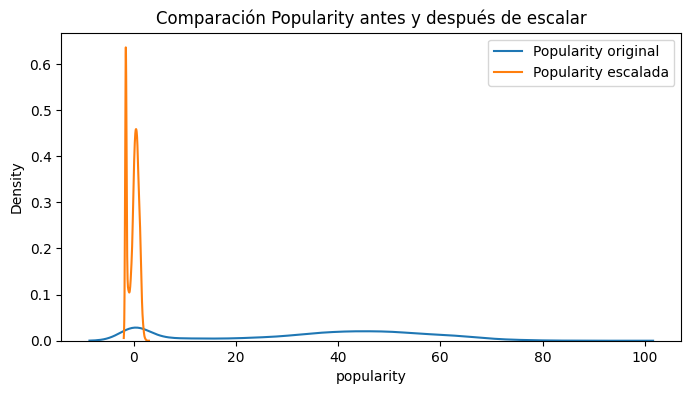

In [36]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['popularity'], label='Popularity original')
sns.kdeplot(df_scaled['popularity_std'], label='Popularity escalada')
plt.title("Comparación Popularity antes y después de escalar")
plt.legend()
plt.show()


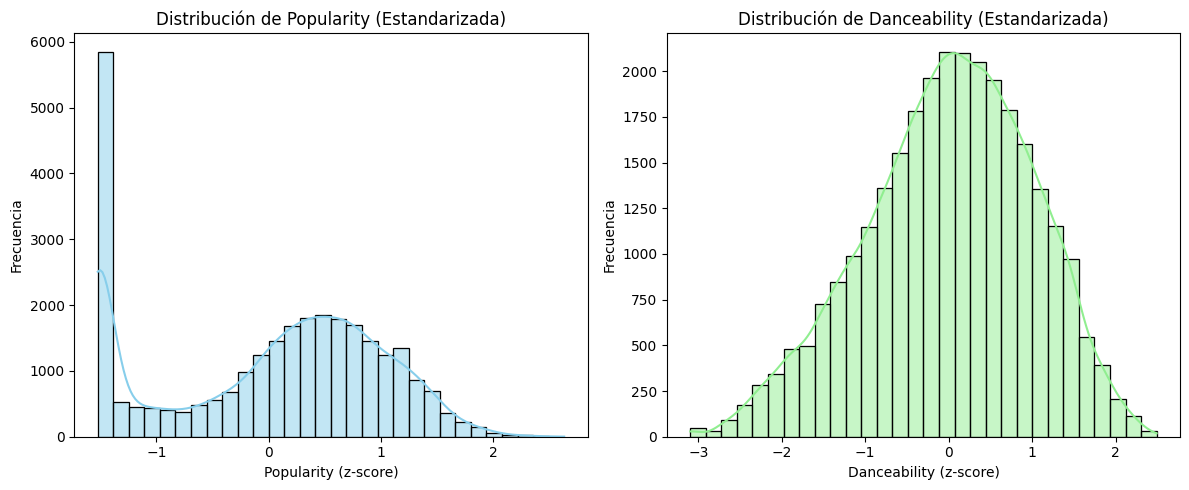

In [37]:
plt.figure(figsize=(12,5))

# Standardized popularity histogram
plt.subplot(1, 2, 1)
sns.histplot(df_scaled['popularity_std'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de Popularity (Estandarizada)")
plt.xlabel("Popularity (z-score)")
plt.ylabel("Frecuencia")

# Histogram of standardized danceability
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['danceability_std'], bins=30, kde=True, color='lightgreen')
plt.title("Distribución de Danceability (Estandarizada)")
plt.xlabel("Danceability (z-score)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


The variables popularity and danceability were selected for scaling because they present different ranges and magnitudes. While popularity ranges from 0 to 100, danceability is measured on a scale from 0 to 1, creating a potential imbalance in comparative or model-based analyses.

To address this issue, the StandardScaler method was applied. This technique standardizes the variables by centering them around their mean and scaling them according to their standard deviation, resulting in transformed values with a mean of 0 and a standard deviation of 1. Unlike Min-Max scaling, this method does not constrain values to a fixed range; instead, it rescales the data based on its distribution.

This transformation enables a more balanced comparison between variables and prevents one feature from disproportionately influencing the analysis due to its original numerical scale.

In [38]:
# Original statistics
stats_original = df[['popularity', 'danceability']].agg(['mean','std','min','max']).rename(columns={
    'popularity':'Popularity Original',
    'danceability':'Danceability Original'
})

# Standardized statistics
stats_scaled = df_scaled[['popularity_std', 'danceability_std']].agg(['mean','std','min','max']).rename(columns={
    'popularity_std':'Popularity Estandarizada',
    'danceability_std':'Danceability Estandarizada'
})

# Join both tables
stats_comparativa = pd.concat([stats_original, stats_scaled], axis=1)
stats_comparativa


,Popularity Original,Danceability Original,Popularity Estandarizada,Danceability Estandarizada
mean,34.060945,0.546490,-2.095952e-16,-1.278382e-16
std,22.376438,0.176474,1.000017e+00,1.000017e+00
min,0.000000,0.000000,-1.522206e+00,-3.096773e+00
max,93.000000,0.986000,2.634024e+00,2.490553e+00


In the table, we observe both the original variables and their standardized versions. After applying StandardScaler, the transformed variables have a mean of 0 and a standard deviation of 1.

The presence of negative and positive values indicates whether an observation is below or above the average, respectively. Values close to zero represent songs with characteristics near the mean, while larger absolute values reflect greater deviation from the typical pattern.

This standardization ensures that both variables contribute proportionally to the analysis, regardless of their original measurement scale.

## 3.2 Categorical Encoding

The categorical variable used is *Genres*, which are the musical genres in the Spotify playlist we studied.

In [39]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder
le = LabelEncoder()

# Apply it to the genres column
df['genres_encoded'] = le.fit_transform(df['genres'])

# Show results
df[['genres', 'genres_encoded']].head(20)


,genres,genres_encoded
0,['show tunes'],10436
1,[Unknown],10742
2,[Unknown],10742
3,[Unknown],10742
4,[Unknown],10742
5,[Unknown],10742
6,[Unknown],10742
7,[Unknown],10742
8,"['comedy rock', 'comic', 'parody']",5741
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",7501


Encoding was applied to the categorical variable genres, where each genre was transformed into a unique numerical value to enable its use in quantitative analysis.

This transformation allows the variable to be processed by statistical models and analytical techniques that require numerical input, while preserving its categorical structure for classification purposes.

### *3.2.1 Benefits and Risks of Transformation*
***Benefit***

- Scaling numerical variables ensures that all features operate on a comparable scale, preventing variables with larger magnitudes from dominating analyses or machine learning models.

- Encoding categorical variables enables numerical models and statistical techniques to process non-numeric data effectively.

- Standardization and encoding facilitate data visualization and statistical analysis, making comparisons more consistent and computationally efficient.

- These transformations improve model stability and performance, particularly in algorithms sensitive to feature scale.

***Risks***

- Transforming variables may reduce interpretability, especially when original units or categorical meanings are altered.

- Assigning numerical values to categorical variables without inherent order (e.g., through label encoding) may introduce misleading hierarchical interpretations if not handled carefully.

- Transforming variables before conducting thorough exploratory data analysis (EDA) may obscure natural patterns, distributions, or outliers present in the raw data.

- Excessive preprocessing without theoretical justification can lead to overcomplication and reduced transparency in the analytical process.

# **4 Advanced Exploratory Analysis (Multivariate Analysis)**



## 4.1 Multivariate Relationship: Duration, Energy, and Popularity

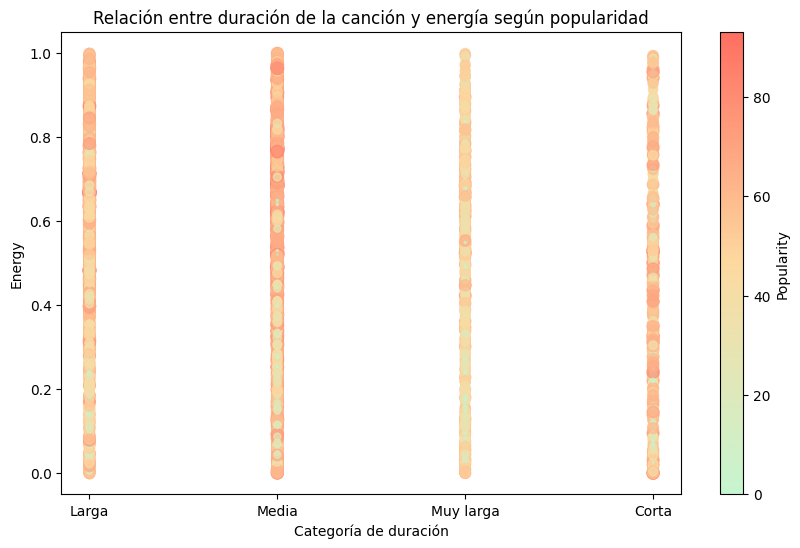

In [40]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Create a custom color map: pastel -> bright red
colors_list = ['#c6f5d0', '#fdd9a0', '#ff6f61']  # pastel green -> pastel orange -> bright red
cmap = mcolors.LinearSegmentedColormap.from_list('popularity_cmap', colors_list)

# Normalize popularity values
norm = plt.Normalize(df['popularity'].min(), df['popularity'].max())
colors = cmap(norm(df['popularity']))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot
sc = ax.scatter(
    x=df['duration_cat'],
    y=df['energy'],
    s=df['popularity'],   # dot size according to popularity
    c=colors,             # color according to popularity
    alpha=0.7
)

# Colorbar using the mappable sc
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Popularity')

# Ttitles and labels
ax.set_title("Relación entre duración de la canción y energía según popularidad")
ax.set_xlabel("Categoría de duración")
ax.set_ylabel("Energy")

plt.show()


**Conclusion: Relationship Between Song Duration, Energy, and Popularity**

Based on the diagram comparing song duration and energy according to popularity levels, several relevant patterns can be observed.

Songs with lower popularity tend to be very long tracks (over 6 minutes) and long tracks (4 to 6 minutes). However, in the case of long songs, maintaining a high energy level (above 0.7) appears to increase their chances of achieving greater popularity. This suggests that duration alone does not determine performance; energy can partially offset the limitations of extended length.

Regarding short songs (less than 2 minutes), energy does not appear to significantly influence popularity. This trend may be linked to recent shifts in music consumption patterns driven by short-form content platforms such as TikTok, Instagram Reels, and YouTube Shorts. Music consumption in digital environments has increasingly favored brief formats, where 15–30 second fragments can go viral and boost overall song visibility. Additionally, shorter songs may generate more repeated streams on platforms like Spotify, as their format facilitates multiple replays, potentially increasing streaming metrics.

Finally, the most popular songs are predominantly medium-length tracks (2 to 4 minutes) with relatively high energy levels (above 0.6). These songs show strong audience engagement, reflected in higher popularity scores. However, medium-length songs with very low energy levels (below 0.1) tend to exhibit moderate popularity, which may be associated with growing trends in relaxation, meditation, and sleep-focused music.

Overall, the analysis suggests that commercial success is influenced by a combination of structural factors (duration and energy) and evolving digital consumption behaviors.

# **5 Energy-Based Segmentation Analysis**

## 5.1 Threshold Analysis: Popularity Differences Above and Below Energy = 0.6

In [41]:
high_energy = df[df['energy'] > 0.6]
low_energy = df[df['energy'] <= 0.6]

mean_high = high_energy['popularity'].mean()
mean_low = low_energy['popularity'].mean()

mean_high, mean_low




(np.float64(44.52142737024264), np.float64(27.55848238404651))

In [42]:
difference = mean_high - mean_low
percentage_difference = (difference / mean_low) * 100
percentage_difference

np.float64(61.55253671013433)

**Quantified Insight**

Songs with energy levels above 0.6 show an average popularity of 44.5, compared to 27.6 for lower-energy tracks.

This represents an approximate 61% higher average popularity for high-energy songs.

These results suggest that higher energy levels are strongly associated with increased streaming performance, although energy alone does not fully determine commercial success.

In [43]:
df['energy'].quantile([0.25, 0.5, 0.75])


,energy
0.25,0.283568
0.50,0.504000
0.75,0.702783


- 25% of the songs have an energy level of 0.28 or less.
- 50% of the songs have an energy level of 0.50 or less.
- 75% of the songs have an energy level of 0.70 or less.
- Only the top 25% have an energy level greater than 0.70.

## 5.2 Quantile-Based Analysis of Energy and Popularity

In [44]:
# Obtain quantiles
q1 = df['energy'].quantile(0.25)
q3 = df['energy'].quantile(0.75)

# Create extreme groups
low_energy = df[df['energy'] <= q1]
high_energy = df[df['energy'] >= q3]

# Calculate average popularity
mean_low = low_energy['popularity'].mean()
mean_high = high_energy['popularity'].mean()

mean_low, mean_high


(np.float64(20.28867400989243), np.float64(44.66641223072915))

In [45]:
difference = mean_high - mean_low
percentage_difference = (difference / mean_low) * 100

percentage_difference


np.float64(120.15441821851212)

**Energy Quartile Analysis**

Songs in the bottom 25% of the energy distribution show an average popularity of 20.29, while songs in the top 25% reach an average of 44.67.

This represents an approximate 120% higher average popularity among high-energy tracks compared to low-energy tracks.

The magnitude of this difference suggests that energy is strongly associated with streaming performance when comparing extreme segments of the distribution. However, this relationship reflects correlation rather than causation, as popularity is also influenced by external factors such as marketing, playlist placement, and artist recognition.

# **6 Popularity Prediction Using Multiple Linear Regression**

In [46]:
df['duration_min'] = df['duration_ms'] / 60000
X = df[['energy', 'duration_min','loudness','danceability','valence', 'speechiness', 'liveness', 'instrumentalness', 'acousticness' ]]
y = df['popularity']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse

(0.3509769285884473, 318.8984726707179)

**Predictive Modeling Results**

A multiple linear regression model was developed using nine acoustic features (energy, duration, loudness, danceability, valence, speechiness, liveness, instrumentalness, and acousticness) to predict track popularity.

The model achieved an R² score of 0.35, indicating that approximately 35% of the variance in popularity can be explained by intrinsic musical characteristics. This suggests that audio features play a meaningful but not dominant role in determining streaming performance.

The model obtained a Mean Squared Error (MSE) of 318.9, corresponding to a Root Mean Squared Error (RMSE) of approximately 18 popularity points on a 0–100 scale. This reflects moderate predictive accuracy.

Overall, the results indicate that while musical attributes contribute to popularity, a substantial portion of streaming success is influenced by external platform dynamics, marketing exposure, and audience behavior.

# **7 Business Implications**

The findings of this analysis provide relevant insights for music producers, streaming platforms, and marketing teams.

First, the results indicate that musical attributes such as energy, danceability, loudness, and duration contribute meaningfully to track popularity. Songs with medium duration (2–4 minutes) and higher energy levels tend to show stronger performance, suggesting that structural musical characteristics influence listener engagement.

However, since the model explains only 35% of popularity variance, streaming success cannot be predicted solely based on audio features. This highlights the importance of external factors such as playlist placement, social media exposure, artist recognition, and recommendation algorithms.

For streaming platforms, these findings suggest that combining acoustic analysis with behavioral and engagement data could improve recommendation systems. For producers and artists, understanding the relationship between track structure and popularity may help guide creative and strategic decisions when targeting mainstream audiences.

Ultimately, data-driven insights can support more informed decisions in music production, marketing strategy, and audience segmentation.


# **8 Final Conclusion**

A total of 28,680 songs with 16 musical, popularity, and metadata features were analyzed. The main findings include:

- Highly unequal popularity distribution: 25% of songs have a popularity score ≤ 12 (on a 0–100 scale), while only the top 25% exceed 51. The IQR of 39 reflects high variability in popularity performance.

- Significant presence of undefined genres: 9,857 songs appeared with empty genre labels (interpreted as “Unknown”), suggesting limitations in metadata quality or classification systems.

- Relevant correlations between musical variables:

   - Strong positive correlation (0.79) between loudness and energy.

  - Strong negative correlation (-0.80) between acousticness and energy.

  - Moderate positive correlation (0.60) between danceability and valence.

- High variability in key features: Variables such as duration_ms, tempo, popularity, and loudness show substantial dispersion, reflecting diversity in musical structure and commercial performance.

- Genres with highest average popularity: “Sleep” leads, followed by “Country / Modern Country Rock,” “Show Tunes,” and “Hollywood.”

- Effect of duration on popularity: Medium-length songs (2–4 minutes), which represent 58.2% of the dataset, concentrate higher popularity levels, especially when energy exceeds 0.6. Songs longer than 6 minutes tend to be less popular.

2. **Relationship with the Objectives**

The main objective was to analyze musical characteristics and their relationship with popularity. This objective was successfully achieved through:

- Exploratory analysis of distributions, outliers, and variability.

- Identification of correlations among audio features.

- Genre and duration segmentation to detect performance patterns.

- Data transformation processes (scaling and encoding) to enable quantitative analysis.

3. **Critical Interpretation**

The concentration of popularity among a small percentage of songs reflects a Pareto-like distribution within the music industry, where few tracks capture most of the attention. This phenomenon is influenced by playlist placement, marketing strategies, and viral exposure on digital platforms.

The correlation between loudness and energy is acoustically coherent, as more energetic songs typically present higher intensity levels. Meanwhile, the moderate relationship between valence and danceability suggests that more danceable music tends to transmit positive emotions, though not consistently.

Regarding duration, the dominance of the 2–4 minute format confirms the persistence of the commercial standard. Songs exceeding 6 minutes tend to perform less favorably, except in niche contexts such as live recordings or experimental compositions.

The prominence of the “Sleep” genre may be explained by its functional use (relaxation and sleep), which encourages repeated streaming in specific listening contexts.

Outliers, such as songs longer than one hour or those exceeding the upper IQR threshold in popularity, likely correspond to live recordings, orchestral suites, experimental productions, or viral hits by highly recognized artists.

4. **Applicability**

From a professional perspective:

- Artists and producers may prioritize medium-length songs (2–4 minutes) with relatively high energy to maximize potential popularity.

- Playlist curators may increase engagement by incorporating functional genres such as “Sleep” or high-performing categories like Country.

- Music marketing strategies should leverage short-form platforms such as TikTok to boost visibility, particularly for shorter tracks.

From an academic perspective:

- The project demonstrates practical applications of exploratory data analysis, correlation analysis, and feature transformation.

- It illustrates how quantitative musical variables can be modeled to better understand performance metrics.

From a social perspective:

- The analysis highlights inequality in musical attention, where few songs achieve mass recognition while many remain unnoticed.

- It reflects how evolving consumption habits and digital ecosystems shape modern definitions of success.

5. **Identified Limitations**

- The 9,857 songs labeled as “Unknown” limit genre-based analysis.

- The dataset spans from 1921 to 2020, meaning historical popularity may not accurately reflect real-time success during original release periods.

- Some categorical variables (e.g., key and mode) were numerically encoded despite lacking ordinal meaning, which may introduce interpretative bias.

- Correlation does not imply causation; strong associations do not establish direct influence.

- Popularity is measured exclusively within Spotify, which does not represent the entire music market.

6. **Suggestions for Future Research**

- Incorporate temporal analysis to evaluate how musical features and popularity evolve across decades.

- Integrate external data sources such as playlist counts, social media mentions, and sales figures.

- Apply predictive modeling (regression or classification) to estimate popularity based on audio features.

- Perform clustering analysis to group songs by musical similarity rather than predefined genres.

- Conduct qualitative case studies of extreme outliers to understand contextual drivers of unusual performance.











